# Unsupervised(Dimensionality reduction) Learning using Scikit Learn - Machine Learning with Python


![](https://i.imgur.com/eyfi64y.png)

The following topics are covered in this tutorial:

- Overview of unsupervised learning algorithms in Scikit-learn
- Dimensionality reduction (PCA) and manifold learning (t-SNE)


Let's install the required libraries.

In [47]:
!pip install numpy pandas matplotlib seaborn --quiet

In [48]:
!pip install scikit-learn  --upgrade --quiet

## Introduction to Unsupervised Learning

Unsupervised machine learning refers to the category of machine learning techniques where models are trained on a dataset without labels. Unsupervised learning is generally use to discover patterns in data and reduce high-dimensional data to fewer dimensions. Here's how unsupervised learning fits into the landscape of machine learning algorithms([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">

Here are the topics in machine learning that we're studying in this series ([source](https://vas3k.com/blog/machine_learning/)): 

<img src="https://i.imgur.com/VbVFAsg.png" width="640">


Scikit-learn offers the following cheatsheet to decide which model to pick for a given problem. Can you identify the unsupervised learning algorithms?

![](https://scikit-learn.org/stable/_static/ml_map.png)

Here is a full list of unsupervised learning algorithms available in Scikit-learn: https://scikit-learn.org/stable/unsupervised_learning.html

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [50]:
iris_df = sns.load_dataset('iris')

In [51]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


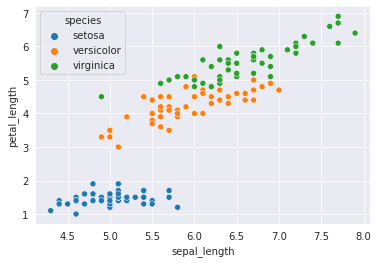

In [52]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');

We'll attempt to cluster observations using numeric columns in the data. 

In [53]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [54]:
X = iris_df[numeric_cols]

## Dimensionality Reduction and Manifold Learning

In machine learning problems, we often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are used to reduce the number of dimensions or features within the data to a manageable or convenient number. 


Applications of dimensionality reduction:

* Reducing size of data without loss of information
* Training machine learning models efficiently
* Visualizing high-dimensional data in 2/3 dimensions


### Principal Component Analysis (PCA)

Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection. Watch this video to learn how PCA works: https://www.youtube.com/watch?v=FgakZw6K1QQ

Here's an example of PCA to reduce 2D data to 1D:

<img src="https://i.imgur.com/ZJ7utlo.png" width="480">

Here's an example of PCA to reduce 3D data to 2D:

<img src="https://lihan.me/assets/images/pca-illustration.png" width="640">


Let's apply Principal Component Analysis to the Iris dataset.

In [55]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [56]:
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=2)

In [59]:
pca.fit(iris_df[numeric_cols])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [60]:
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [61]:
transformed = pca.transform(iris_df[numeric_cols])

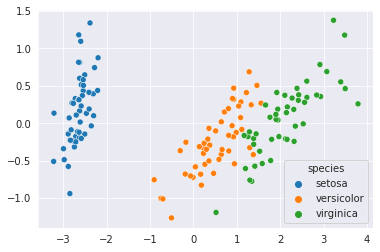

In [62]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);

As you can see, the PCA algorithm has done a very good job of separating different species of flowers using just 2 measures.

> **EXERCISE**: Apply Principal Component Analysis to a large high-dimensional dataset and train a machine learning model using the low-dimensional results. Observe the changes in the loss and training time for different numbers of target dimensions.

Learn more about Principal Component Analysis here: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Scikit-learn provides many algorithms for manifold learning: https://scikit-learn.org/stable/modules/manifold.html . A commonly-used manifold learning technique is t-Distributed Stochastic Neighbor Embedding or t-SNE, used to visualize high dimensional data in one, two or three dimensions. 

Here's a visual representation of t-SNE applied to visualize 2 dimensional data in 1 dimension:

<img src="https://i.imgur.com/rVMAaix.png" width="360">


Here's a visual representation of t-SNE applied to the MNIST dataset, which contains 28px x 28px images of handrwritten digits 0 to 9, a reduction from 784 dimensions to 2 dimensions ([source](https://colah.github.io/posts/2014-10-Visualizing-MNIST/)):

<img src="https://indico.io/wp-content/uploads/2015/08/mnist-1024x607-1.jpg" width="640">

Here's a video explaning how t-SNE works: https://www.youtube.com/watch?v=NEaUSP4YerM

In [63]:
from sklearn.manifold import TSNE

In [64]:
tsne = TSNE(n_components=2)

In [65]:
transformed = tsne.fit_transform(iris_df[numeric_cols])

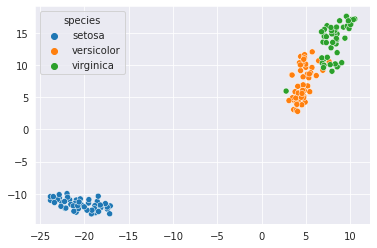

In [66]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);

As you can see, the flowers from the same species are clustered very closely together. The relative distance between the species is also conveyed by the gaps between the clusters.

> **EXERCISE**: Use t-SNE to visualize the [MNIST handwritten digits dataset](https://www.kaggle.com/oddrationale/mnist-in-csv).

## Summary and References

<img src="https://i.imgur.com/VbVFAsg.png" width="640">

The following topics were covered in this tutorial:

- Overview of unsupervised learning algorithms in Scikit-learn
- Clustering algorithms: K Means, DBScan, Hierarchical clustering etc.
- Dimensionality reduction (PCA) and manifold learning (t-SNE)


Check out these resources to learn more:

- https://www.coursera.org/learn/machine-learning
- https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/
- https://scikit-learn.org/stable/unsupervised_learning.html
- https://scikit-learn.org/stable/modules/clustering.html